In [2]:
import json
with open('activities.json') as f:
    activities = json.load(f)
print len(activities)

107


In [12]:
swims = filter(lambda a: a['type'].lower() == 'swim', activities)
print len(swims), 'swims'

69 swims


In [48]:
import pandas as pd
data = pd.DataFrame.from_records(swims).sort('start_date')
data = data.set_index('start_date')
print data[['distance', 'elapsed_time']].iloc[:10]

                      distance  elapsed_time
start_date                                  
2014-09-03T16:00:00Z      2000          3600
2014-09-08T16:25:00Z      2000          3000
2014-09-10T16:47:29Z      2000          2820
2014-09-17T18:22:09Z      2000          2760
2014-09-20T15:19:51Z      2500          3900
2014-09-24T16:18:00Z      2000          3000
2014-09-29T16:26:00Z      1700          2520
2014-10-02T16:42:00Z      1500          2100
2014-10-06T16:13:00Z      1700          2400
2014-10-08T17:05:00Z      1500          2520


In [49]:
data['speed'] = data['distance'] / data['elapsed_time']
print data[['distance', 'elapsed_time', 'speed']].iloc[:10]

                      distance  elapsed_time     speed
start_date                                            
2014-09-03T16:00:00Z      2000          3600  0.555556
2014-09-08T16:25:00Z      2000          3000  0.666667
2014-09-10T16:47:29Z      2000          2820  0.709220
2014-09-17T18:22:09Z      2000          2760  0.724638
2014-09-20T15:19:51Z      2500          3900  0.641026
2014-09-24T16:18:00Z      2000          3000  0.666667
2014-09-29T16:26:00Z      1700          2520  0.674603
2014-10-02T16:42:00Z      1500          2100  0.714286
2014-10-06T16:13:00Z      1700          2400  0.708333
2014-10-08T17:05:00Z      1500          2520  0.595238


http://pandas.pydata.org/pandas-docs/stable/computation.html#moving-rolling-statistics-moments

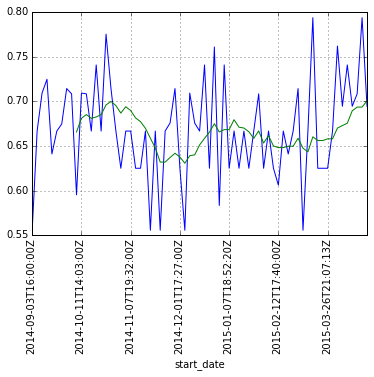

In [62]:
import pylab as pl
%matplotlib inline

ts = data['speed']
ts.plot(rot=90)
pd.rolling_mean(ts, 10).plot(style='g', rot=90)

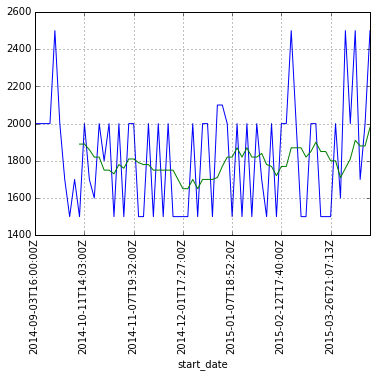

In [64]:
data['distance'].plot()
pd.rolling_mean(data['distance'], 10).plot(style='g', rot=90)